<a href="https://colab.research.google.com/github/bartexx37/DeepLearning/blob/main/07_Food_Vision_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi|

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-17 10:32:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-17 10:32:46 (70.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Getting helper functions
import helper_functions as hp

In [ ]:
#hp.unzip_data("101_food_classes_10_percent.zip")
#train_dir = "101_food_classes_10_percent/train/"
#test_dir = "101_food_classes_10_percent/test"
train_dir="C:/Users/barto/OneDrive/Pulpit/DL_TF/101_food_classes_10_percent/101_food_classes_10_percent/train"
test_dir="C:/Users/barto/OneDrive/Pulpit/DL_TF/101_food_classes_10_percent/101_food_classes_10_percent/test"

In [ ]:
#How many images/classes there
hp.walk_through_dir("101_food_classes_10_percent")

In [ ]:
#Get tensorflow Datasets
import tensorflow_datasets as tfds

In [ ]:
dataset_list=tfds.list_builders()
print("food101" in dataset_list)

True


In [ ]:
#Load in the data
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True, #Data gets terutned in tuple format (data,label)
                                             with_info=True) #Meta-data info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteM8UC2I/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteM8UC2I/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
#Take one sample of train_data
train_one_sample = train_data.take(1) # Foremat (image tensor, label)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_one_sample:
    print(f"Image shape: {image.shape}, \nImage dtype: {image.dtype},\n Target class from food (tensor form): {label}, \nClass name {class_names[label.numpy()]}")

Image shape: (512, 512, 3), 
Image dtype: <dtype: 'uint8'>,
 Target class from food (tensor form): 81, 
Class name ramen


In [ ]:
import tensorflow as tf
#As it can be seen, labels are not onehot encoded
#Check how image look like
image, tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
 array([[[242, 254, 252],
         [241, 253, 251],
         [240, 252, 250],
         ...,
         [241, 211, 101],
         [242, 212, 102],
         [245, 215, 105]],
 
        [[240, 252, 250],
         [240, 252, 250],
         [239, 251, 249],
         ...,
         [245, 215, 105],
         [242, 212, 102],
         [240, 210, 100]],
 
        [[238, 250, 248],
         [238, 250, 248],
         [238, 250, 248],
         ...,
         [250, 218, 107],
         [243, 211, 100],
         [238, 206,  95]],
 
        ...,
 
        [[ 82,  81,  77],
         [ 83,  82,  78],
         [ 82,  81,  77],
         ...,
         [126, 128, 127],
         [135, 137, 136],
         [139, 141, 140]],
 
        [[ 82,  79,  74],
         [ 82,  79,  74],
         [ 81,  78,  73],
         ...,
         [209, 209, 209],
         [217, 217, 217],
         [215, 215, 215]],
 
        [[ 78,  75,  70],
         [ 77,  74,  69],
         [ 76,

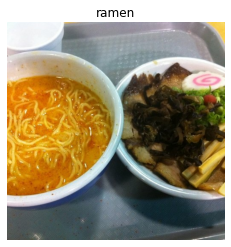

In [ ]:
#Plot image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

**PREPROCESS DATA TO MODELS TRAINING**
- Good shape
- Normalize -> between (0-1) generally performs better
- Data type -> models like float32 and with mixed precision float16/float32
- batches? -> Like all of the tensord within a batfch be the same size

**NOW DATA IS**
- In uint8 datatype
- With different size tensors
- Is not scaled              


In [ ]:
#EfficientNetBx will be used, which has scaling built in, so rescaling is not needed in this case

#1. Reshape to same size
#2. Convert the dtype of images to float32

In [ ]:
#Function to preprocess img
def preprocess_img(image,label,img_shape=224):
    '''
    Convert image datatype to float32 and reshapes
    image to  [img_shape,img_shape,color_channels]
    '''
    
    img=tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(img, tf.float32), label # return (float32_image,label)

In [ ]:
#preprocess single sample to check 
preprocessed_image = preprocess_img(image,label)[0]
print(f"Image before prep:\n {image[:2]}... \nShape: {image.shape}\nDatatype: {image.dtype}\n Prep image:\n{preprocessed_image[:2]}...\nShape: {preprocessed_image.shape}\nDatatype:{preprocessed_image.dtype}")

Image before prep:
 [[[242 254 252]
  [241 253 251]
  [240 252 250]
  ...
  [241 211 101]
  [242 212 102]
  [245 215 105]]

 [[240 252 250]
  [240 252 250]
  [239 251 249]
  ...
  [245 215 105]
  [242 212 102]
  [240 210 100]]]... 
Shape: (512, 512, 3)
Datatype: <dtype: 'uint8'>
 Prep image:
[[[240.4847  252.4847  250.4847 ]
  [238.42857 250.42857 248.42857]
  [238.29082 249.86224 248.07652]
  ...
  [251.4235  219.20923 107.78071]
  [246.3571  216.3571  106.3571 ]
  [241.92346 211.92346 101.92346]]

 [[237.07143 249.07143 247.07143]
  [238.      250.      248.     ]
  [240.14285 250.14285 249.14285]
  ...
  [248.22957 215.28569 101.85716]
  [250.99489 218.99489 106.27042]
  [243.07126 211.07126 100.07126]]]...
Shape: (224, 224, 3)
Datatype:<dtype: 'float32'>


**Batch and prepare datasets**
- input pipelines

Map preprocessing function to training (and parallelize)

In [ ]:
#Mapping
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)#PO to, żeby możliwie jak największą
                                                                                         #liczbe chipów CPU wykorzysytwał równolegle
                                                                                         #Po defaultowo tylko 1 i wolniej
#Shuffle train_data and turn it into batches and prefetch it (load faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE) 
#shuffle(buffer_size Parameter say how many elements to shuffle in one moment, pamięć RAM może ograniczać ilość, stad nie całość na raz

#Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
#prefetch - while program find patterns in one batch, during that time get another batch ready - pobierać wstępnie
#.catch() - zapisuje co sie dzieje w pamięci RAM, żeby pamietało, ale zapycha to RAM więc zależy

In [ ]:
train_data,test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

Creating model callback

In [ ]:
tensorboard_callback = hp.create_tensorboard_callback(dir_name="C:/Users/barto/OneDrive/Pulpit/DL_TF/t_board_food_app",
                               experiment_name="Vision_App")

checkpoint_path = "C:/Users/barto/OneDrive/Pulpit/DL_TF/foodapp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

Saving TensorBoard log files to: C:/Users/barto/OneDrive/Pulpit/DL_TF/t_board_food_app/Vision_App/20230217-105220


**MIXED PRECISION TRAINING**

In [ ]:
#Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")#Set global data policy to mixed precision
#For any part of tensorflow models learning if possible it combinates float32 with float16 to speed up model performance
mixed_precision.global_policy()

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


<Policy "mixed_float16">

**BUILDING FEATURE EXTRACTION MODEL**

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
augmentation_layer = tf.keras.Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip(),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2)
],name="Augmentation_Layer")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name="Input_Layer")

#If  scaling woulkd be needed then
#x= preprocessing.Rescaling(1/255.)(X) or in augmentation layer 

#x = augmentation_layer(inputs)
x = base_model(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Polling")(x)
x = tf.keras.layers.Dense(101)(x)
outputs = tf.keras.layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)

model = tf.keras.Model(inputs,outputs)

#Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Because this time labeles are not onehot encoded
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Polling (GlobalAveragePooli  (None, 1280)             0         
 ng2D)                                                           
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
#Check dtype of base model
for layer in base_model.layers:
    print(layer.name,layer.dtype, layer.dtype_policy)

input_1 float32 <Policy "float32">
rescaling float32 <Policy "mixed_float16">
normalization float32 <Policy "mixed_float16">
rescaling_1 float32 <Policy "mixed_float16">
stem_conv_pad float32 <Policy "mixed_float16">
stem_conv float32 <Policy "mixed_float16">
stem_bn float32 <Policy "mixed_float16">
stem_activation float32 <Policy "mixed_float16">
block1a_dwconv float32 <Policy "mixed_float16">
block1a_bn float32 <Policy "mixed_float16">
block1a_activation float32 <Policy "mixed_float16">
block1a_se_squeeze float32 <Policy "mixed_float16">
block1a_se_reshape float32 <Policy "mixed_float16">
block1a_se_reduce float32 <Policy "mixed_float16">
block1a_se_expand float32 <Policy "mixed_float16">
block1a_se_excite float32 <Policy "mixed_float16">
block1a_project_conv float32 <Policy "mixed_float16">
block1a_project_bn float32 <Policy "mixed_float16">
block2a_expand_conv float32 <Policy "mixed_float16">
block2a_expand_bn float32 <Policy "mixed_float16">
block2a_expand_activation float32 <Poli

**FIT THE MODEL**
1. Feature extraction
2. Fine tuning

In [ ]:
#Fitting model
history = model.fit(train_data,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.15*len(test_data)),
                    callbacks=[tensorboard_callback,model_checkpoint])

Epoch 1/3
  52/2368 [..............................] - ETA: 44:06:40 - loss: nan - accuracy: 0.0096

In [ ]:
model.evaluate(test_data)